LEVEL 20 — HOW SWIGGY SCALES TO 1 MILLION USERS

LEVEL 20.0 — THE CORE PROBLEM (VERY IMPORTANT)

Imagine this:
- 1,000,000 users open the app
- 50,000 orders per minute
- Everyone clicks “Place Order”

what breaks first?

one python program / one server cannot handle this

so we split responsibilities.

LEVEL 20.1 — SINGLE SERVER (WHY IT FAILS)
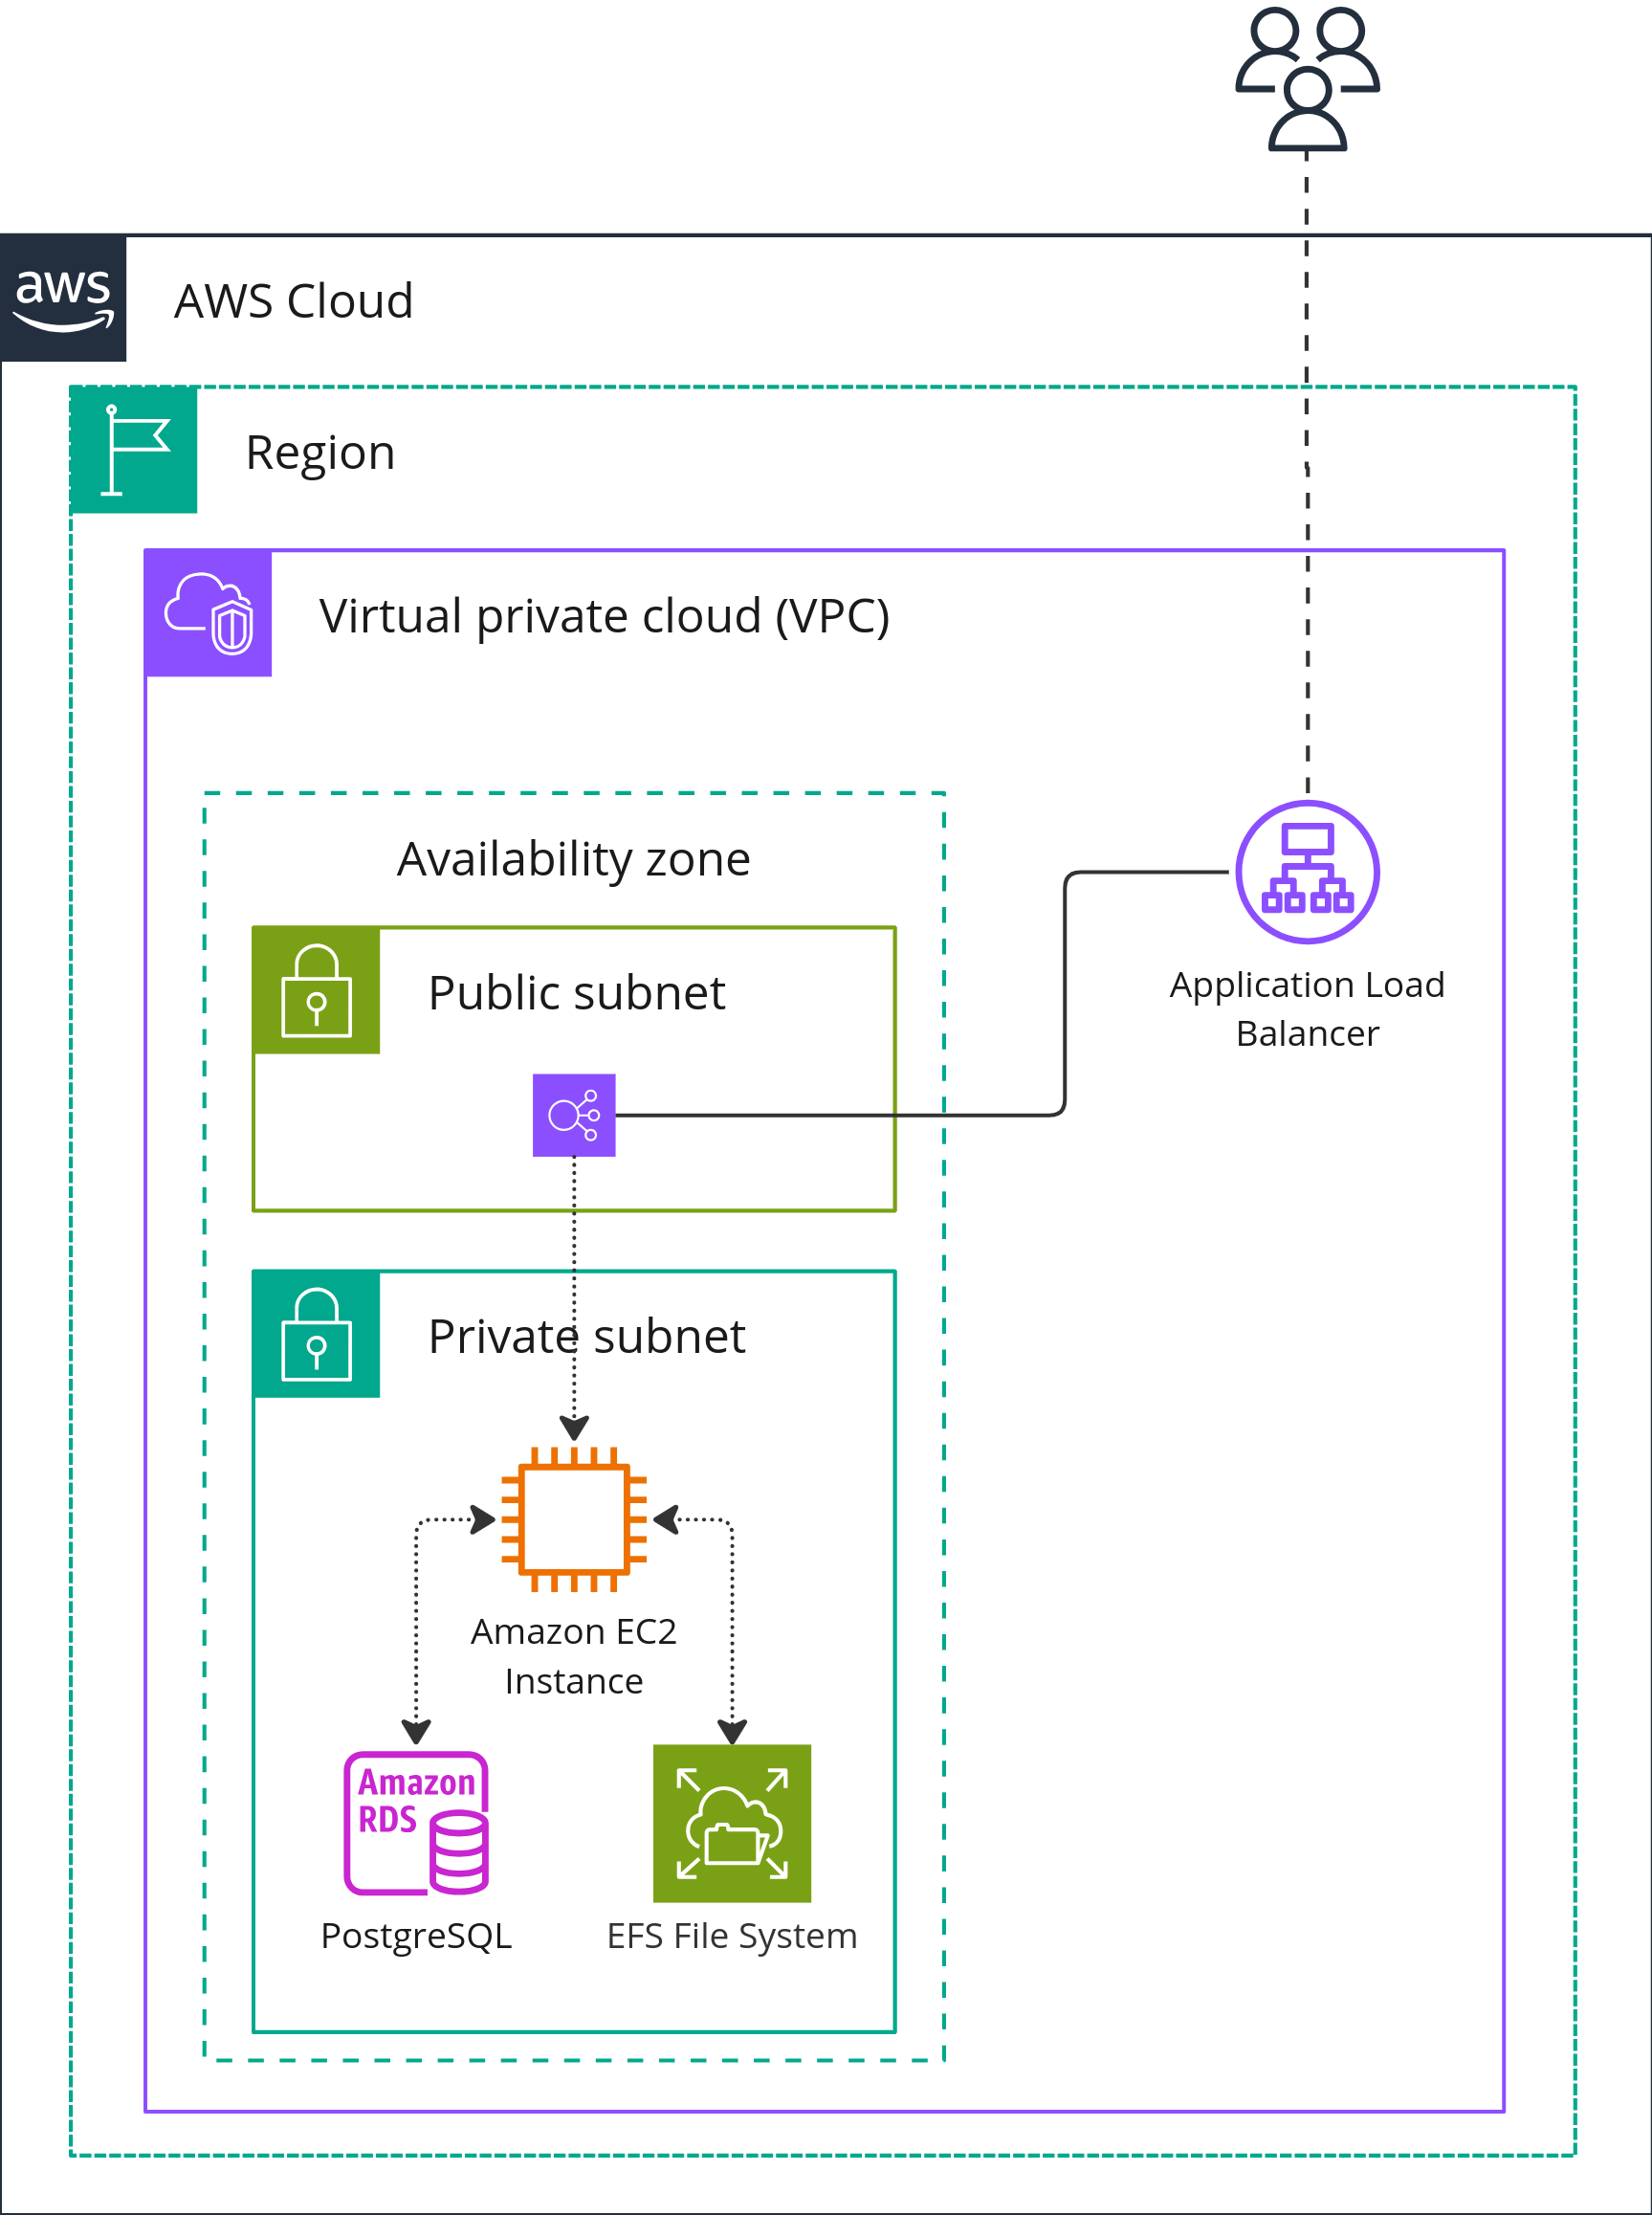
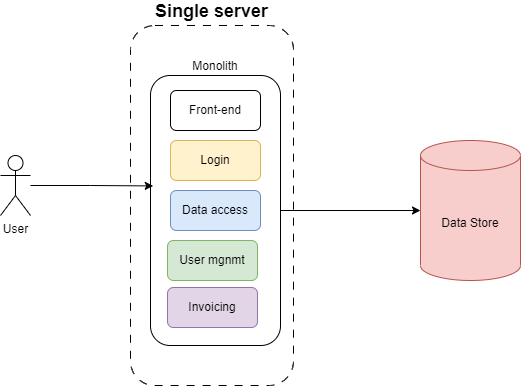

What happens?
- CPU overloaded
- Memory full
- Requests slow
- Server crashes ❌

## Solution: Add more servers

LEVEL 20.2 — LOAD BALANCING (FIRST SCALING STEP)

Instead of 1 server, use many servers.
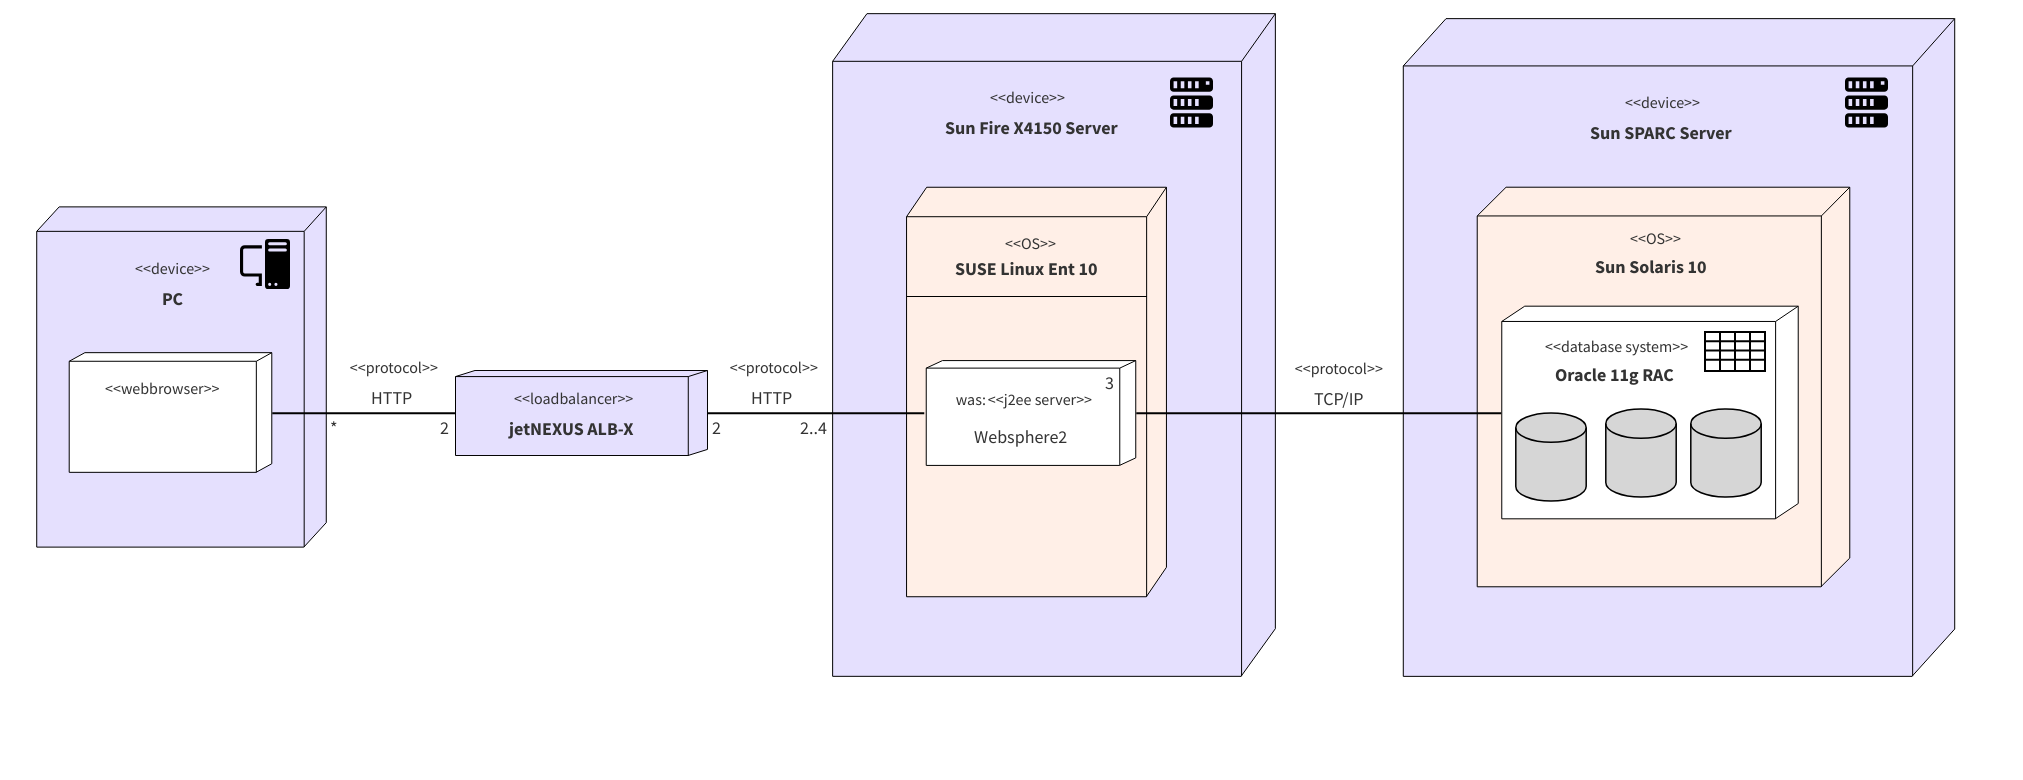
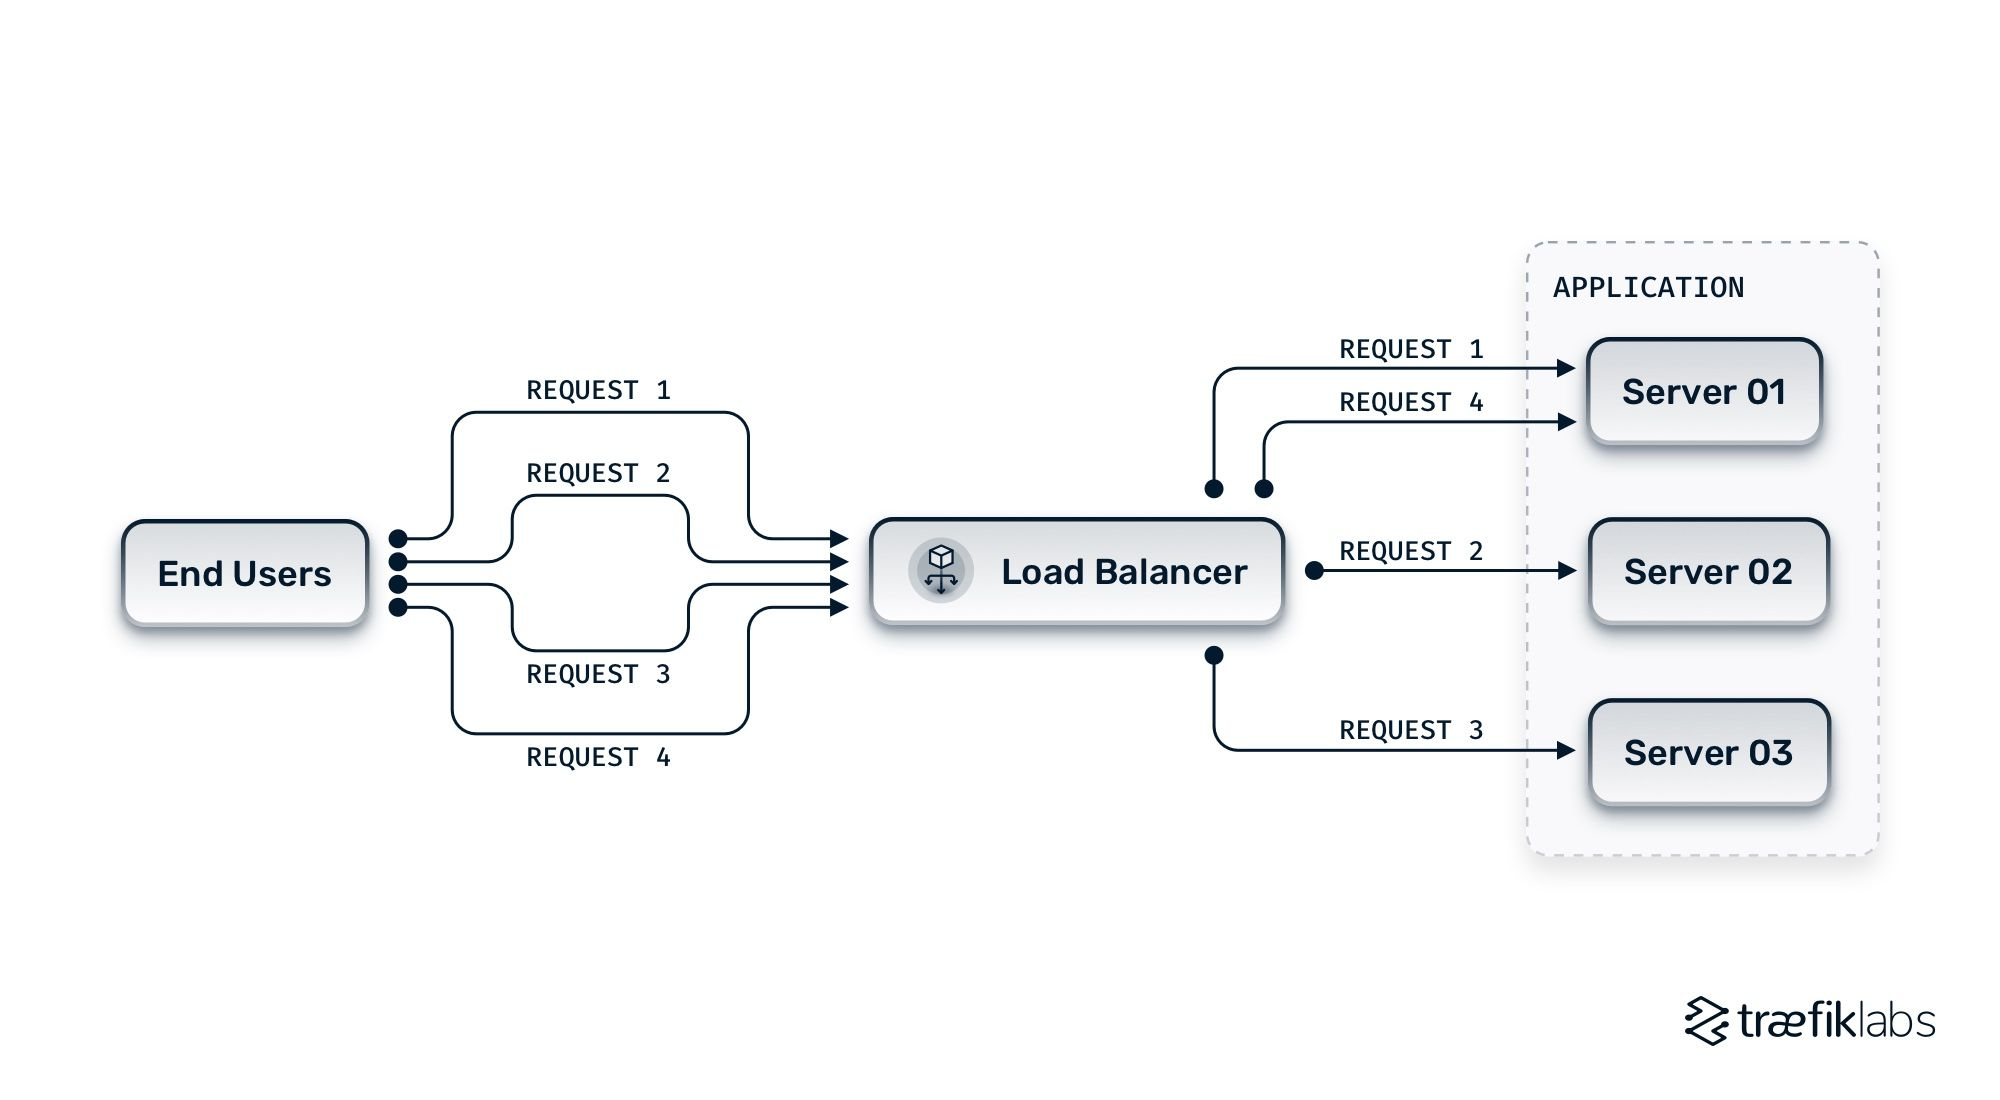

How it works:
- User request → Load Balancer
- Load Balancer → any free server

In [ ]:
LoadBalancer(["server1", "server2", "server3"])

Result:
- Traffic divided
- No single server overloaded

LEVEL 20.3 — STATELESS SERVERS 

Problem:

If server stores order in memory → other servers don’t know it.

BAD:
- server1 has order data
- server2 knows nothing

Solution:

Servers should be stateless

They:
- Read/write from database
- Don’t store permanent data

Keyword: Stateless backend

LEVEL 20.4 — DATABASE BOTTLENECK (NEXT FAILURE)

Even with many servers:
- Everyone hits same database
- DB becomes slow ❌
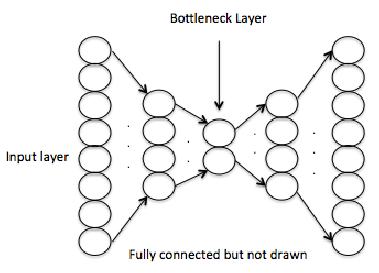
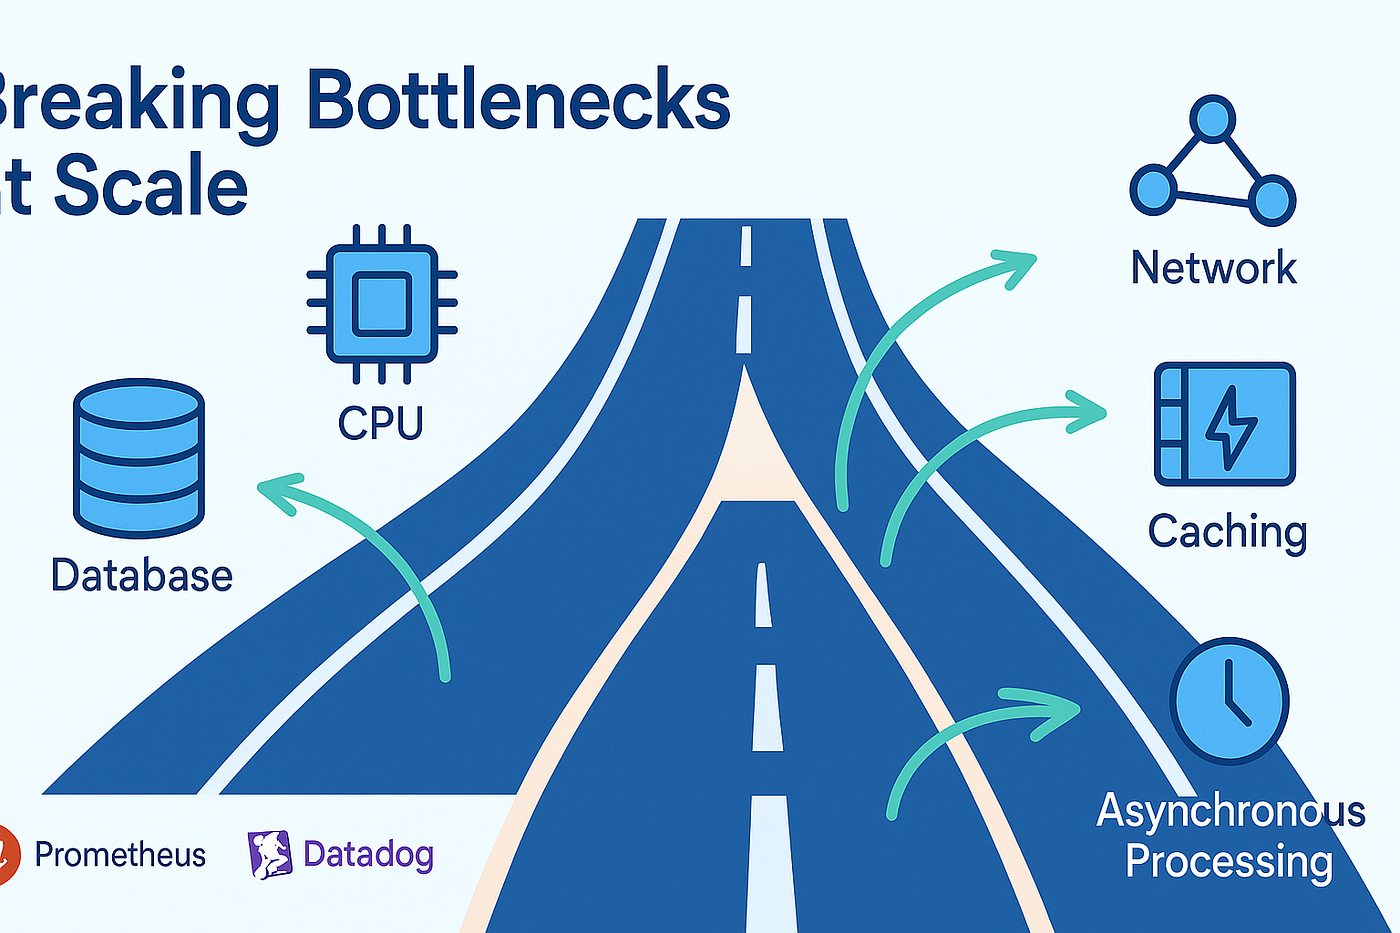

LEVEL 20.5 — CACHE (REDIS LOGIC)

What is cache?
- Fast memory before database.
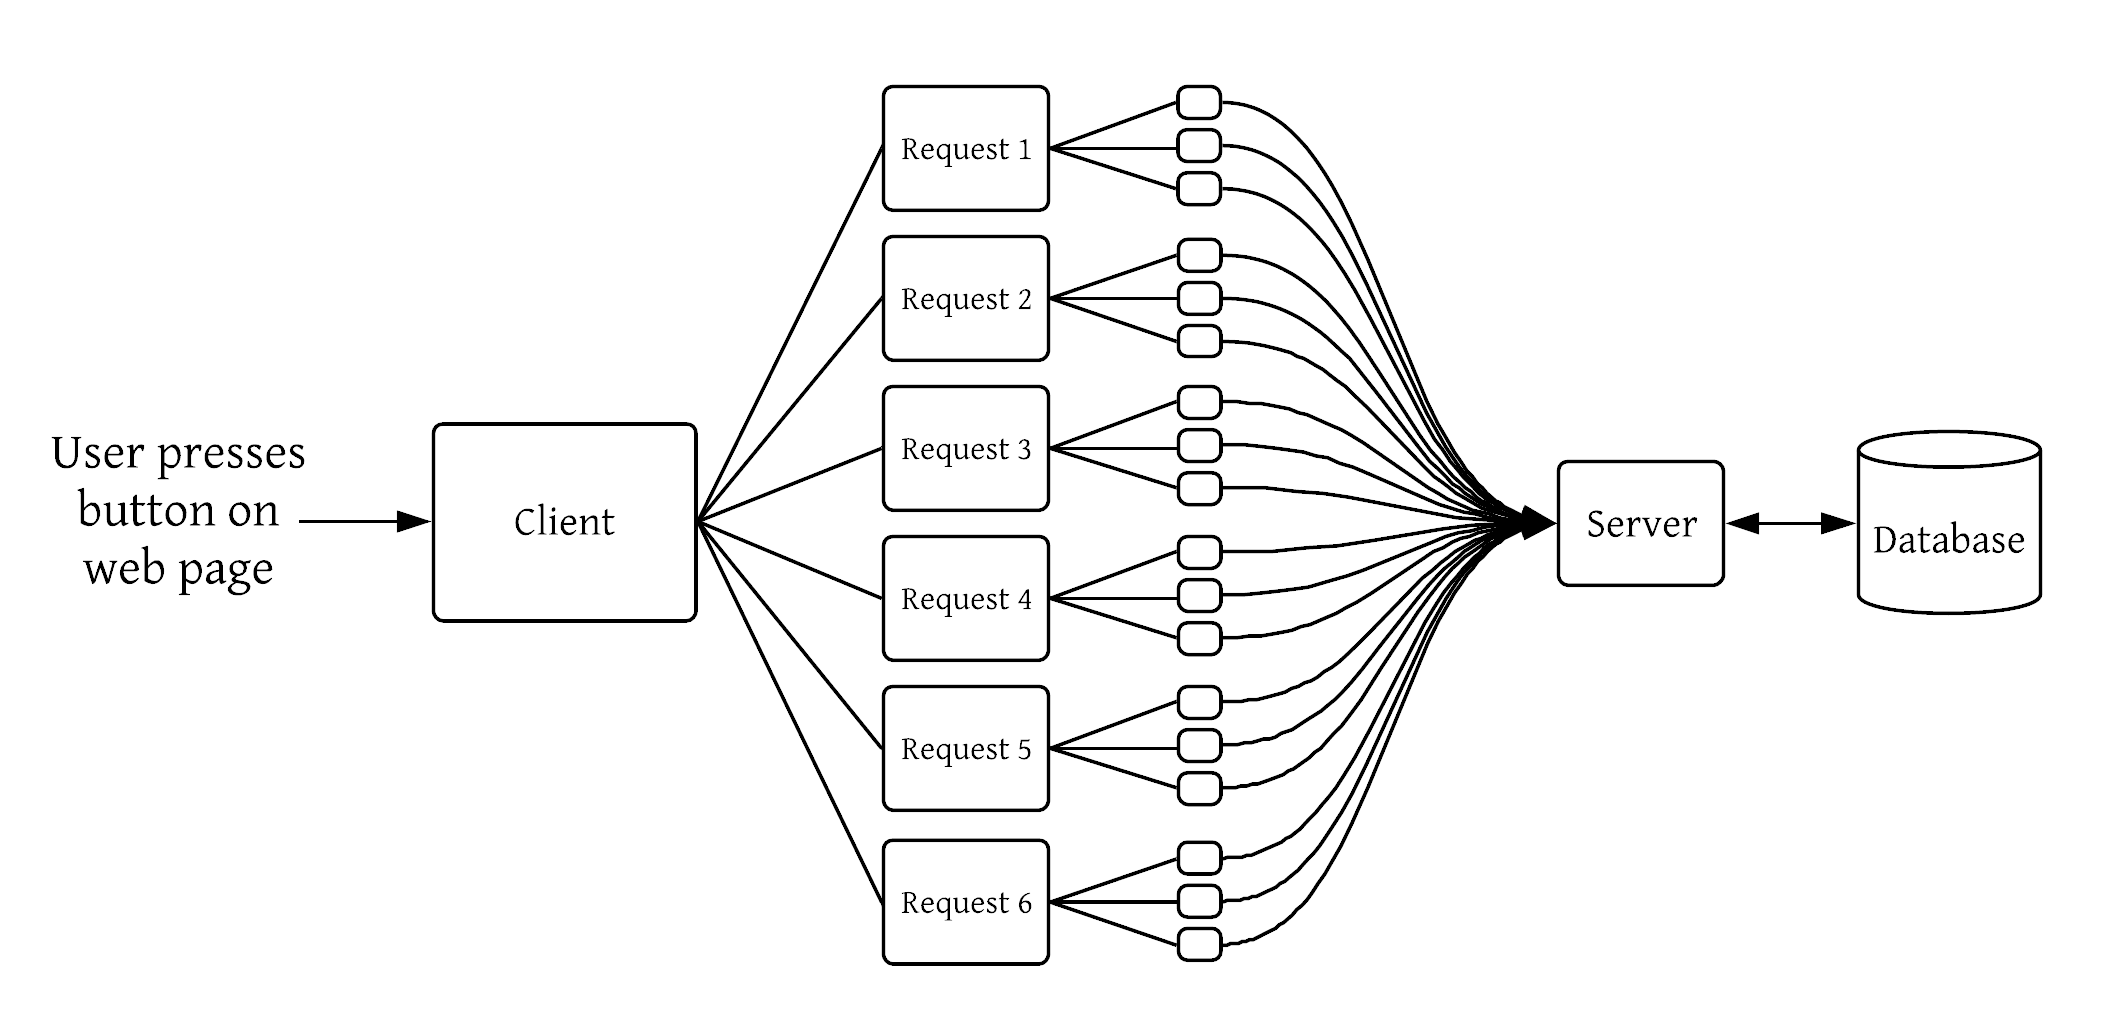
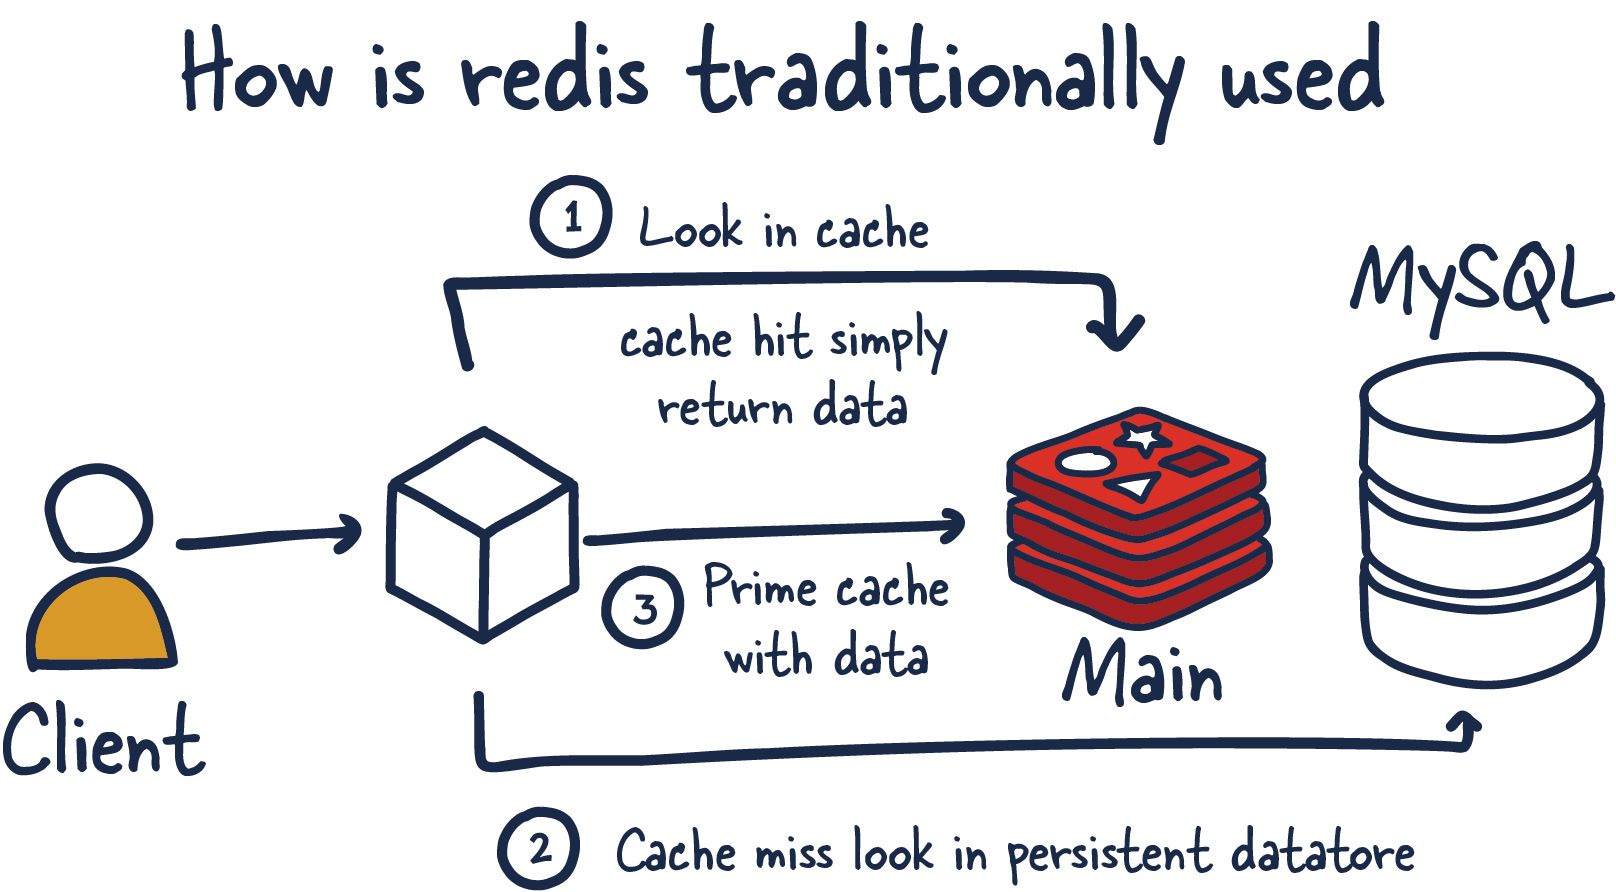

Example:
- Restaurant menu requested 10,000 times
- Fetch from DB once
- Next requests → cache

In [ ]:
menu = cache.get("dominos_menu")

Result:
- DB load reduced
- Faster response

LEVEL 20.6 — MESSAGE QUEUE (ORDER SURGE PROTECTION)

Problem:
- Orders spike during lunch/dinner.
- If processed immediately → system crashes.

Solution:
- Queue orders
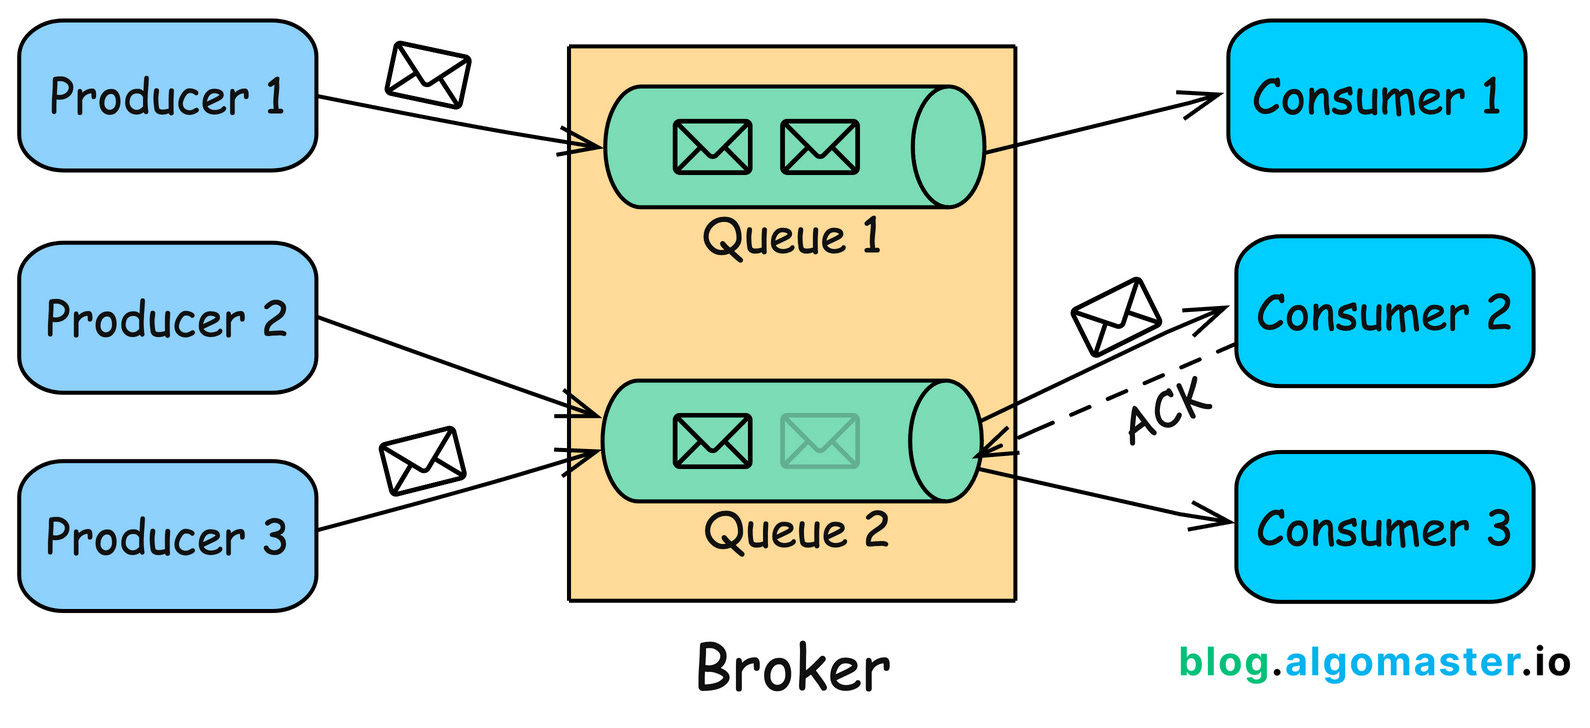
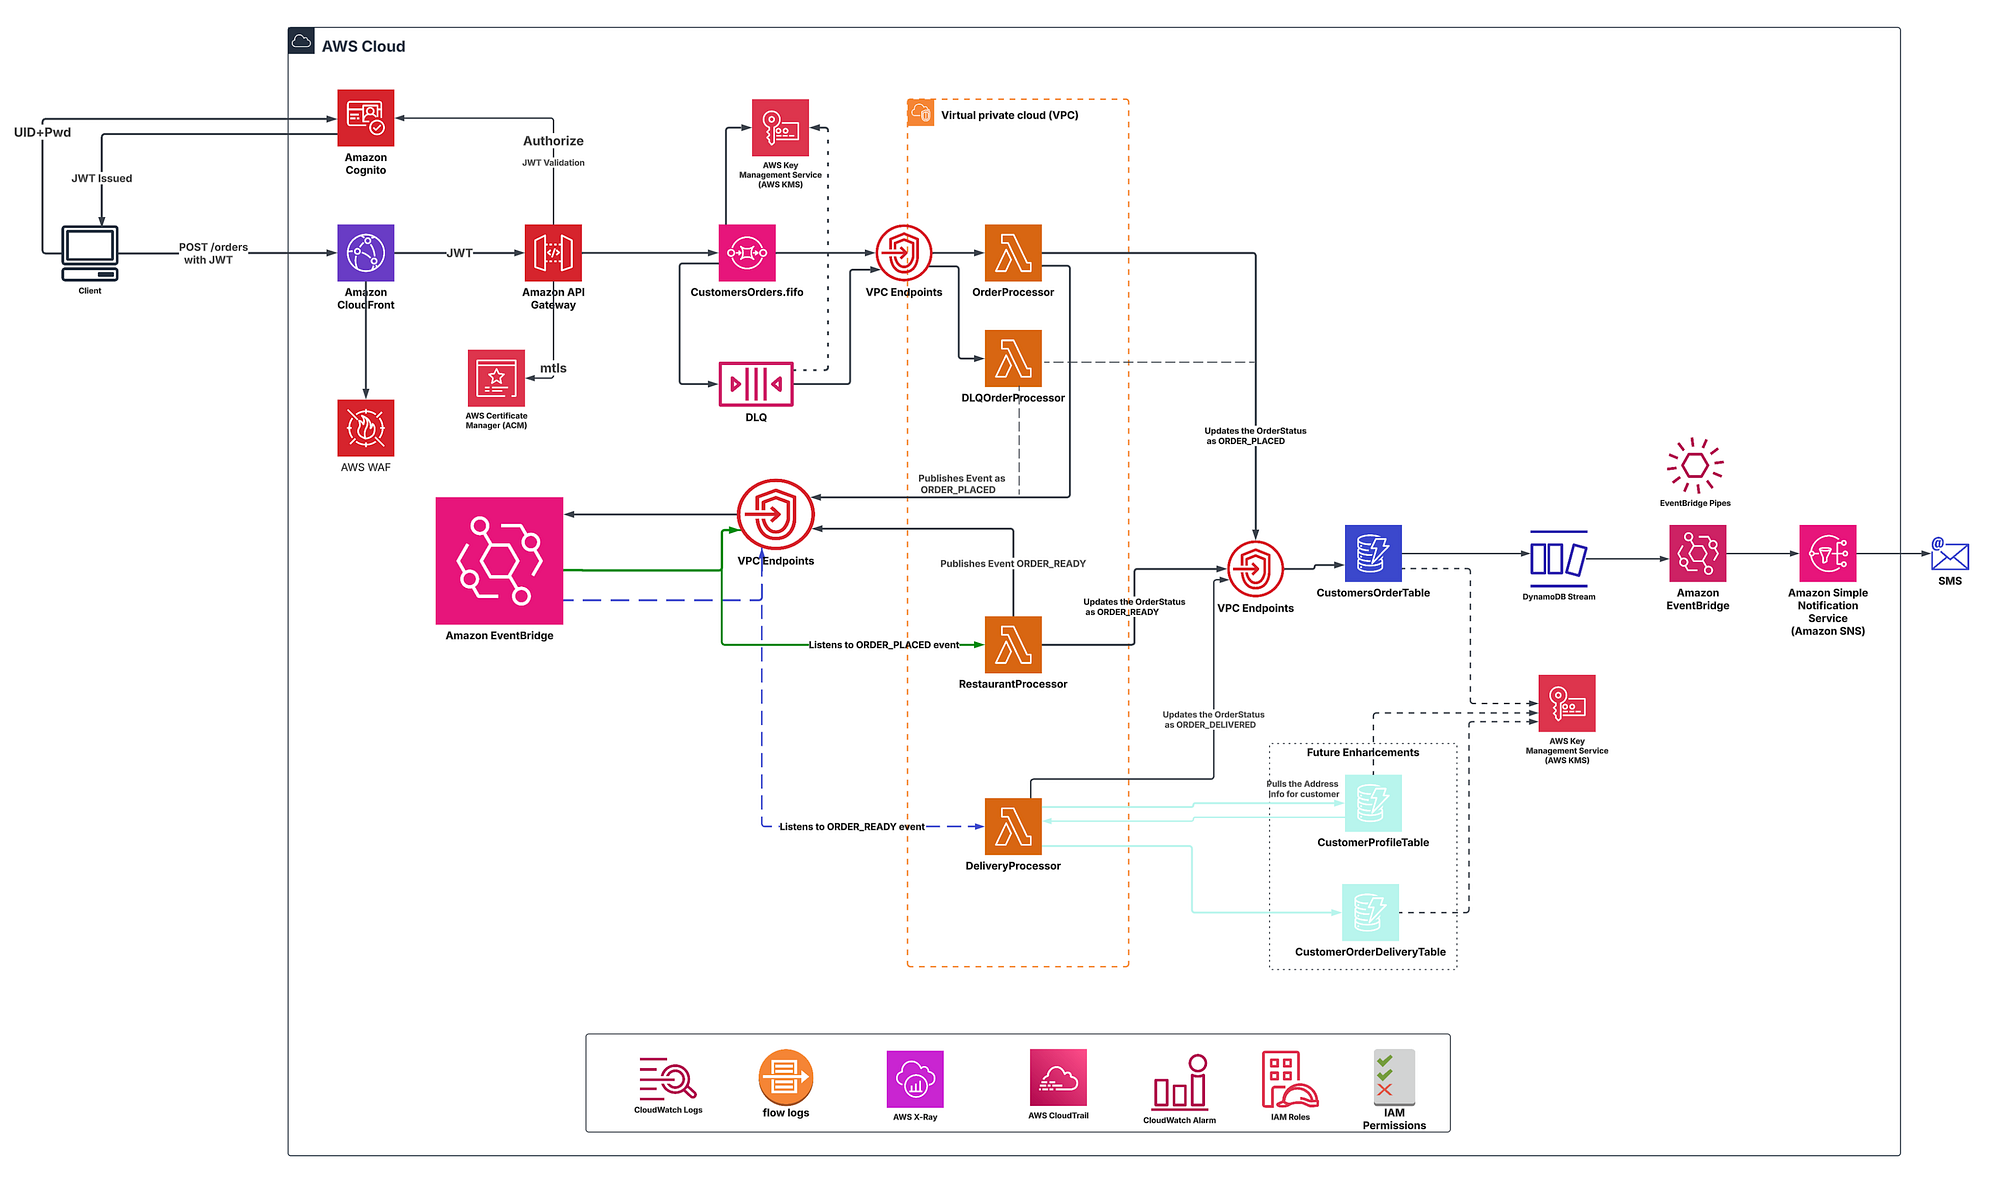

In [ ]:
Flow:
User → API → Queue → Worker

Your Python: 
queue.push(order)
# Workers process slowly & safely.

LEVEL 20.7 — ASYNC WORKERS (BACKGROUND PROCESSING)

Workers:
- Confirm order
- Assign delivery
- Send notifications

User doesn’t wait.
- Keyword:
- Asynchronous processing

LEVEL 20.8 — DATABASE SCALING (READ REPLICAS)

Problem:

Too many READS (menus, orders)

Solution:
- 1 Master DB (writes)
- Many Read Replicas (reads)
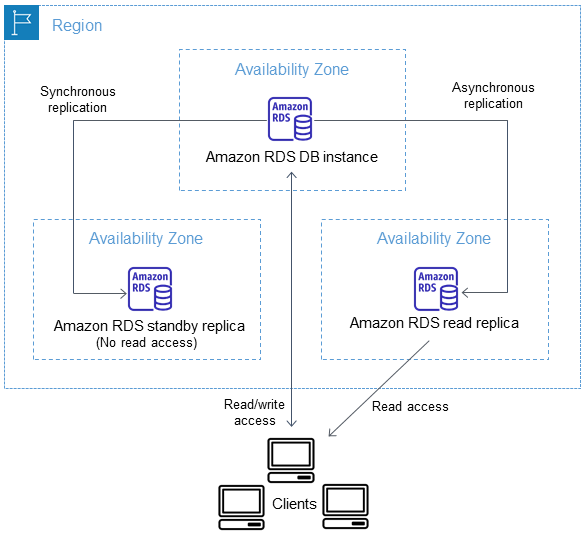
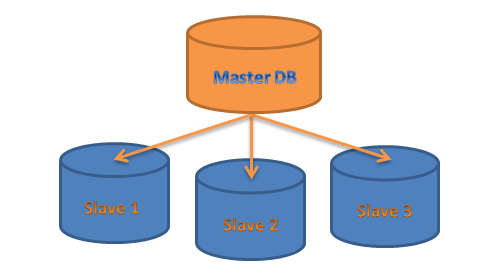

Result:
- Faster reads
- Writes safe

LEVEL 20.9 — SHARDING (ADVANCED BUT SIMPLE)

Problem:
- Orders table too large.

Solution:
- Split data.


orders_1 → user_id 1–1M

orders_2 → user_id 1M–2M

#### Horizontal sharding

LEVEL 20.10 — RATE LIMITING (PROTECTION)

Why?
- Prevent spam
- Prevent attacks

You already built:

In [ ]:
RateLimiter(2, 10)
# Real system uses same logic.

LEVEL 20.11 — FAILURE HANDLING (REAL WORLD)

What if:
- Worker crashes?
- Server dies?

Solutions:
- Retry
- Queue persistence
- Health checks

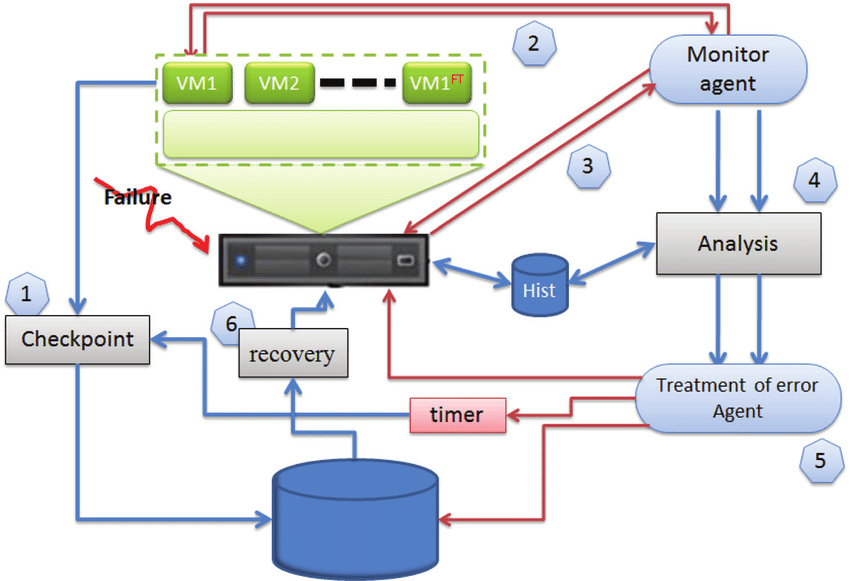
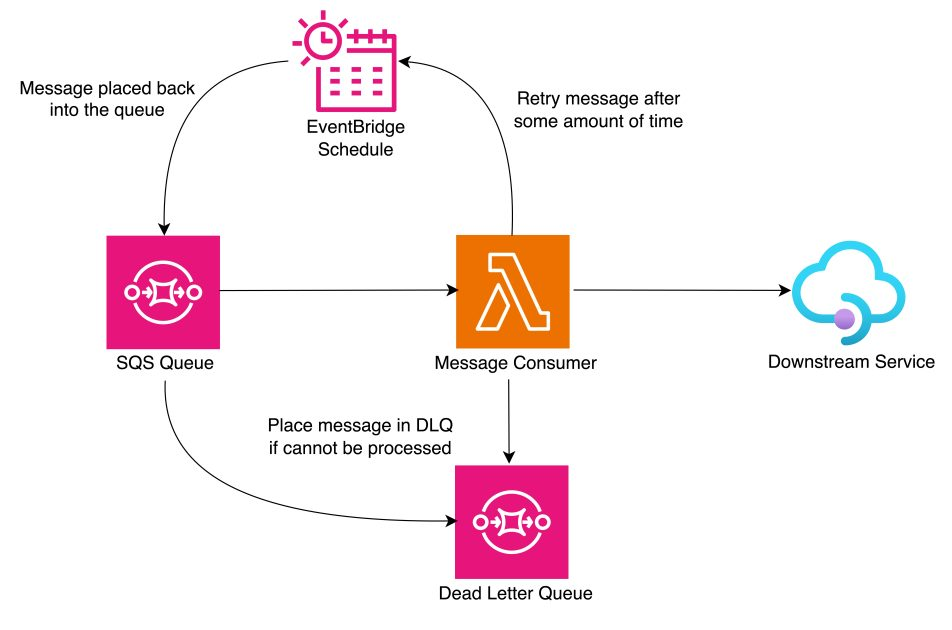

Keyword:

Fault-tolerant system

# FULL SCALING SUMMARY (IMPORTANT)

This is a **high-level system design cheat sheet** used by **backend engineers** during interviews and real production scaling.

---

## 🚨 Scaling Problems & Proven Solutions

| Problem            | Solution                     |
|--------------------|------------------------------|
| Too many users     | Load balancer                |
| Server overload    | Multiple stateless servers   |
| DB slow            | Cache                        |
| Traffic spikes     | Queue                        |
| Slow response      | Async workers                |
| Huge data          | Sharding                     |
| Too many reads     | Read replicas                |
| Abuse              | Rate limiting                |
| Failures           | Retry + queue                |

---

## 1️⃣ Too Many Users → Load Balancer

Distributes incoming requests across multiple servers.

**Benefits**
- Prevents single server overload
- High availability
- Horizontal scaling

Examples:
- Round-robin
- Least connections
- IP hash

---

## 2️⃣ Server Overload → Multiple Stateless Servers

Servers should not store user session data locally.

**Why stateless?**
- Any server can handle any request
- Easy to add/remove servers
- Fault tolerant

Session data stored in:
- Redis
- Database
- JWT tokens

---

## 3️⃣ Database Slow → Cache

Avoid hitting the database repeatedly.

**Cache layers**
- In-memory cache (Redis, Memcached)
- Application-level cache

**Used for**
- Frequently read data
- Hot keys
- Configuration data

---

## 4️⃣ Traffic Spikes → Queue

Buffers sudden traffic surges.

**How it helps**
- Smoothens load
- Prevents crashes
- Handles peak traffic safely

Common use cases:
- Order processing
- Email sending
- Notifications

---

## 5️⃣ Slow Response → Async Workers

Move heavy tasks out of request-response cycle.

**Examples**
- Image processing
- Payment confirmation
- Log processing

Flow: Request → Queue → Worker → Result


---

## 6️⃣ Huge Data → Sharding

Split large datasets into smaller parts.

**Types**
- Horizontal sharding (by user_id, region)
- Vertical sharding (by table/domain)

**Benefits**
- Faster queries
- Parallel processing
- Scales databases

---

## 7️⃣ Too Many Reads → Read Replicas

Duplicate databases for read operations.

**How it works**
- Primary DB → writes
- Replica DBs → reads

**Advantages**
- Reduces load on primary
- Improves read performance

---

## 8️⃣ Abuse → Rate Limiting

Protect system from misuse.

**Limits**
- Requests per second
- Requests per minute
- Per IP / per user

**Tools**
- Token bucket
- Leaky bucket

---

## 9️⃣ Failures → Retry + Queue

Systems fail — design for it.

**Retry**
- Temporary failures
- Network issues

**Queue**
- Guarantees delivery
- Prevents data loss

Best practice:
- Retry with exponential backoff
- Dead-letter queues

---

## 🔑 Final Takeaway

> **Every scaling problem already has a standard solution.  
Good backend engineers recognize the problem and apply the right pattern.**

This table alone can answer **50% of system design interview questions**.

✅ Save this. Revise before interviews.